<a href="https://www.kaggle.com/code/benardmwinzi/hotel-bookings-eda?scriptVersionId=159419405" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***Hotel Data Analysis Project***

### *Author: Benard Mwinzi*

# **Summary**

This data analysis project aims to conduct exploratory data analysis to understand the hotel dataset a company provides that helps international travelers secure hotels in destination countries. This analysis will help investors understand the best places to invest in hospitality based on the presence of customers.

The hotel dataset contains information about bookings made by tourists from different countries to different destinations.

# **Loading the Neccessary libraries**

In [1]:
# Importing necessary libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import plotly.express as px
import warnings
import matplotlib
warnings.filterwarnings('ignore')

# **Loading the dataset and inspecting it**

In [2]:
#Loading the hotel dataset

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('../input/hotel-bookings-data/Hotel_Dataset.csv', encoding='latin-1')
df.head()

/kaggle/input/hotel-bookings-data/Hotel_Dataset.csv


,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,...,Check-Out Date,Rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,1/1/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,1/20/2010,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.07,0.25
1,DDID00002,1/1/2010,9:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,1/22/2010,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.07,0.24
2,DDSG00003,1/1/2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,1/9/2010,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.07,0.20
3,DDSG00004,1/1/2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,2/19/2010,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.07,0.13
4,DDKH00005,1/1/2010,5:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,1/6/2010,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.07,0.17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66541 entries, 0 to 66540
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Booking ID           66541 non-null  object 
 1   Date of Booking      66541 non-null  object 
 2   Time                 66541 non-null  object 
 3   Customer ID          66541 non-null  object 
 4   Gender               66541 non-null  object 
 5   Age                  66541 non-null  int64  
 6   Origin Country       66541 non-null  object 
 7   State                66541 non-null  object 
 8   Location             66541 non-null  object 
 9   Destination Country  66541 non-null  object 
 10  Destination City     66541 non-null  object 
 11  No. Of People        66541 non-null  int64  
 12  Check-in date        66541 non-null  object 
 13  No of Days           66541 non-null  int64  
 14  Check-Out Date       66541 non-null  object 
 15  Rooms                66541 non-null 

# **Date Cleaning**
The info() function shows that the data is complete. The variable datatypes are consistent with their expected data except for the date of booking, Check-in date, and Check-out date variables.

In [4]:
#Changing the date variables to date data types
df["Date of Booking"] =pd.to_datetime(df["Date of Booking"])
df["Check-Out Date"] = pd.to_datetime(df["Check-Out Date"])
df["Check-in date"] = pd.to_datetime(df["Check-in date"])

In [5]:
#Checking the columns in the dataset
df.columns

Index(['Booking ID', 'Date of Booking', 'Time', 'Customer ID', 'Gender', 'Age',
       'Origin Country', 'State', 'Location', 'Destination Country',
       'Destination City', 'No. Of People', 'Check-in date', 'No of Days',
       'Check-Out Date', 'Rooms', 'Hotel Name', 'Hotel Rating', 'Payment Mode',
       'Bank Name', 'Booking Price[SGD]', 'Discount', 'GST', 'Profit Margin'],
      dtype='object')

In [6]:
#Removing the columns with no statistical meaning in the project
df = df.drop(['Gender','Age','No. Of People','No of Days','Payment Mode','Hotel Rating','Bank Name', 'State', 'Location','Booking Price[SGD]', 'Discount', 'GST', 'Profit Margin'], axis =1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66541 entries, 0 to 66540
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Booking ID           66541 non-null  object        
 1   Date of Booking      66541 non-null  datetime64[ns]
 2   Time                 66541 non-null  object        
 3   Customer ID          66541 non-null  object        
 4   Origin Country       66541 non-null  object        
 5   Destination Country  66541 non-null  object        
 6   Destination City     66541 non-null  object        
 7   Check-in date        66541 non-null  datetime64[ns]
 8   Check-Out Date       66541 non-null  datetime64[ns]
 9   Rooms                66541 non-null  int64         
 10  Hotel Name           66541 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 5.6+ MB


In [8]:
# Removing spaces in column names
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Booking_ID,Date_of_Booking,Time,Customer_ID,Origin_Country,Destination_Country,Destination_City,Check-in_date,Check-Out_Date,Rooms,Hotel_Name
0,DDMY00001,2010-01-01,10:49:40,MY00001,Malaysia,Denmark,Horsens,2010-01-12,2010-01-20,1,Hotel Triton
1,DDID00002,2010-01-01,9:19:47,ID00001,Indonesia,Colombia,Medellin,2010-01-21,2010-01-22,2,Enchanted Isle
2,DDSG00003,2010-01-01,11:52:56,SG00001,Singapore,Germany,Munich,2010-01-02,2010-01-09,2,Seacoast Hotel
3,DDSG00004,2010-01-01,13:44:40,SG00002,Singapore,Canada,Montreal,2010-02-15,2010-02-19,2,Night In Paradise
4,DDKH00005,2010-01-01,5:38:26,KH00001,Cambodia,Kenya,Nairobi,2010-01-03,2010-01-06,3,Tiny Digs Hotel


In [9]:
#Checking duplicates in the dataset
df.duplicated().sum()

5

In [10]:
# Dropping duplicates
df = df.drop_duplicates()
#Checking dimension of the new datset
df.shape

(66536, 11)

The clean dataset has 66536 rows in 24 variables.

# **Exploratory Data Analysis**

The EDA was conducted by summarizing and filtering the data and then visualizing it using charts.

This EDA was conducted to answer the following research questions:

a) Which are the top 10 cities that received bookings?

### *a) Which are the top 10 cities that received bookings*

In [11]:
# extracting the top 10 cities by number of bookings
top_10_cities = df[["Destination_City","Booking_ID"]].groupby(["Destination_City"]).count().reset_index().sort_values(by = "Booking_ID", ascending = False).head(10)
top_10_cities

,Destination_City,Booking_ID
45,Hamilton,1084
13,Bello,646
14,Belo Horizonte,635
27,Dublin,628
8,Auckland,624
104,Shanghai,620
115,Toronto,608
44,Haifa,607
54,Jaipur,602
113,Tijuana,597


Text(0, 0.5, 'Number of Bookings')

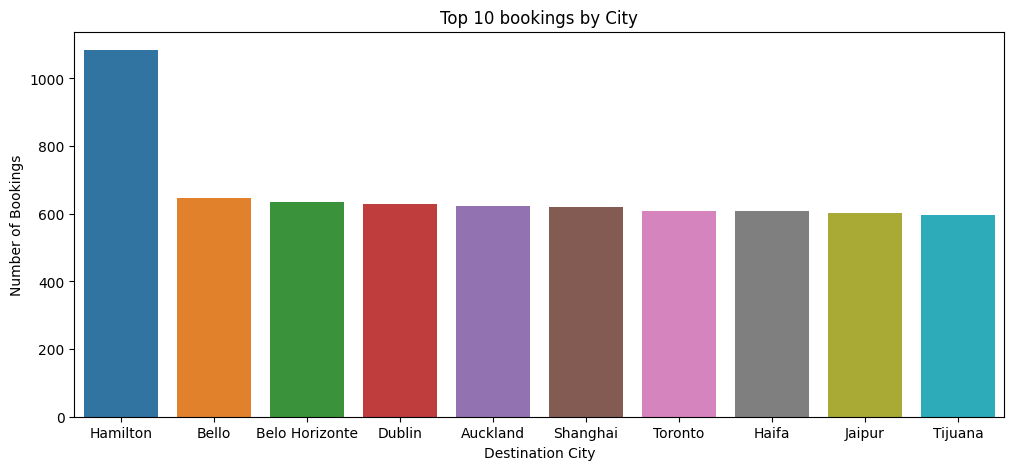

In [12]:
#Visualizating the top 10 
plt.figure(figsize=(12,5))
ax=sns.barplot(x = "Destination_City",
            y = "Booking_ID",
            data = top_10_cities).set(title = "Top 10 bookings by City")
sns.set_style("darkgrid")
plt.xlabel("Destination City")
plt.ylabel("Number of Bookings")

Hamilton City had the highest booking. The other cities with the top 10 highest bookings include Bello, Belo Horizonte, Dublin, Auckland, Shangai Toronto, Haifa, Jaipur, and Tijuana.

We need to check the number of bookings for hotels in Hamilton.

***-- Most Booked hotels in Hamilton***

In [13]:
# extracting the data for Hamilton Hotel only
Hamilton_Hotels = df.loc[df['Destination_City']=="Hamilton"]

In [14]:
#Grouping the data for all hotels in Hamilton City based on the number of bookings per hotel and selecting the top 5 hotels
Top_Hamilton_Hotels = Hamilton_Hotels[["Hotel_Name","Booking_ID"]].groupby(["Hotel_Name"]).count().reset_index().sort_values(by = "Booking_ID", ascending = False).head(5)
Top_Hamilton_Hotels

,Hotel_Name,Booking_ID
257,Pacific Inn Hotel & Suites,8
136,Green Tortoise Hostel,6
15,Aman Resorts,6
350,Starlight,6
427,The Nines,6


Text(0, 0.5, 'Number of Bookings')

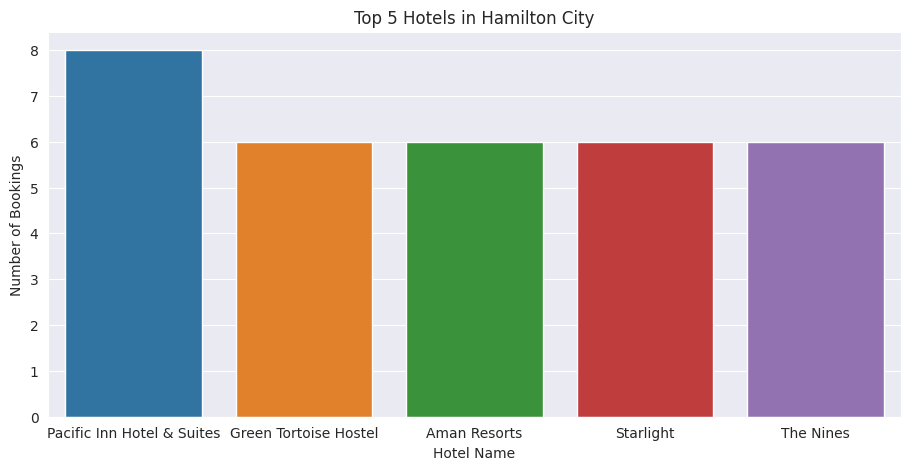

In [15]:
#Visualizating the top 5 
plt.figure(figsize=(11,5))
ax=sns.barplot(x = "Hotel_Name",
            y = "Booking_ID",
            data = Top_Hamilton_Hotels).set(title = "Top 5 Hotels in Hamilton City")
sns.set_style("darkgrid")
plt.xlabel("Hotel Name")
plt.ylabel("Number of Bookings")

Grand Hyatt is the most booked hotel in Hamilton, the most booked city.

### *b) Where do the customers come from?*

In [16]:
# Grouping the data by country of origin
#Calculating the number of bookings per weekday
Origin_Country_Customers = df[['Origin_Country','Customer_ID']].groupby(['Origin_Country']).count().reset_index()
#Changing the Customer_ID column name to Number of Customers
Origin_Country_Customers = Origin_Country_Customers.rename(columns ={"Customer_ID": "Number_of_Customers"})
Origin_Country_Customers

,Origin_Country,Number_of_Customers
0,Cambodia,5952
1,Indonesia,11986
2,Malaysia,12049
3,Philippines,6383
4,Singapore,12037
5,Thailand,12170
6,Vietnam,5959


Text(0, 0.5, 'Number of Customers')

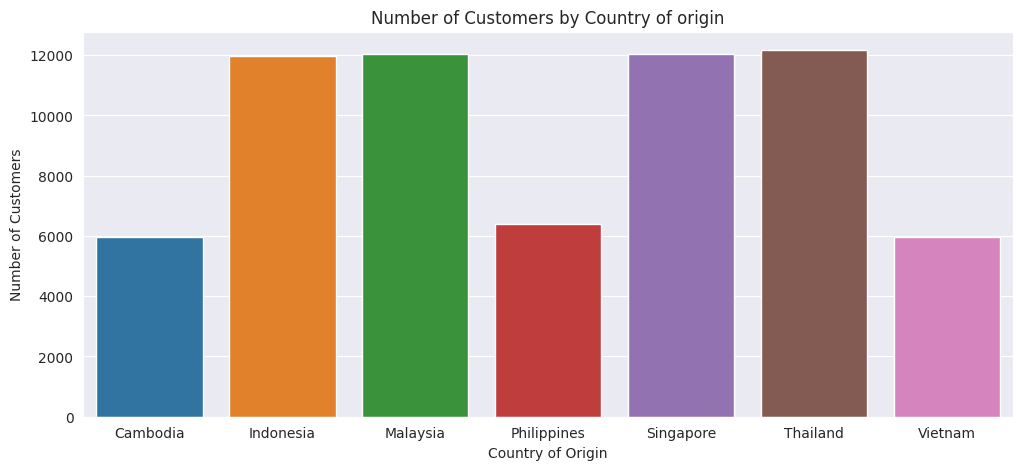

In [17]:
#Visualizating the top 10 
plt.figure(figsize=(12,5))
ax=sns.barplot(x = "Origin_Country",
            y = "Number_of_Customers",
            data = Origin_Country_Customers).set(title = "Number of Customers by Country of origin")
sns.set_style("darkgrid")
plt.xlabel("Country of Origin")
plt.ylabel("Number of Customers")

The customers come from seven different countries. The countries with the highest number of customers include Indonesia, Malaysia, Singapore, and Thailand. 

### *c) Does the number of bookings have any seasonality?*

To answer this research question, we need to create a month and weekday columns from the bookings date column.

In [18]:
# Creating the weekday column
df['Weekday'] = df.Date_of_Booking.dt.day_name()
df['Month'] = df.Date_of_Booking.dt.month_name()
df.head(3)

,Booking_ID,Date_of_Booking,Time,Customer_ID,Origin_Country,Destination_Country,Destination_City,Check-in_date,Check-Out_Date,Rooms,Hotel_Name,Weekday,Month
0,DDMY00001,2010-01-01,10:49:40,MY00001,Malaysia,Denmark,Horsens,2010-01-12,2010-01-20,1,Hotel Triton,Friday,January
1,DDID00002,2010-01-01,9:19:47,ID00001,Indonesia,Colombia,Medellin,2010-01-21,2010-01-22,2,Enchanted Isle,Friday,January
2,DDSG00003,2010-01-01,11:52:56,SG00001,Singapore,Germany,Munich,2010-01-02,2010-01-09,2,Seacoast Hotel,Friday,January


In [19]:
#Calculating the number of bookings per weekday
weekday_bookings = df[['Weekday','Booking_ID']].groupby(['Weekday']).count().reset_index().sort_values(by = "Booking_ID", ascending = True)
weekday_bookings

,Weekday,Booking_ID
5,Tuesday,9295
3,Sunday,9408
6,Wednesday,9466
4,Thursday,9486
1,Monday,9597
0,Friday,9618
2,Saturday,9666


Text(0, 0.5, 'Number of Bookings')

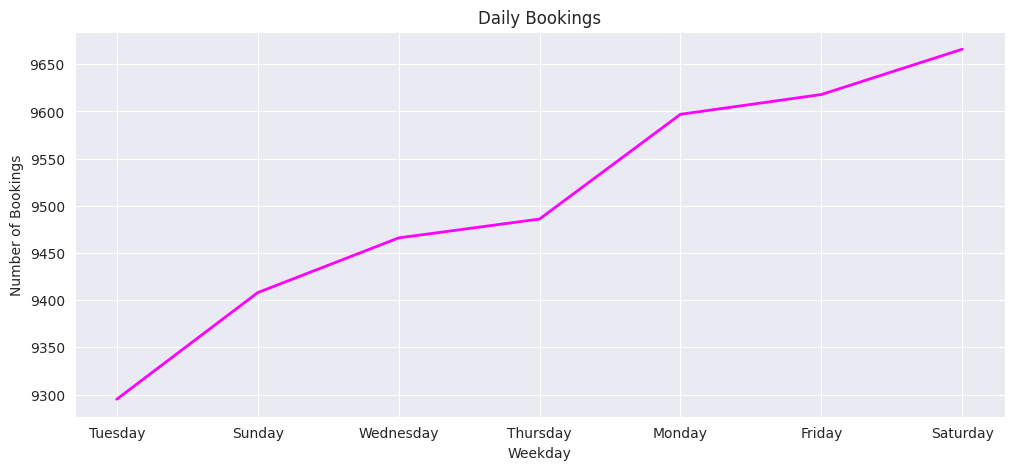

In [20]:
#Visualizating the top 10 
weekday_order = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(12,5))
ax=sns.lineplot(x = "Weekday",
            y = "Booking_ID",
            data = weekday_bookings,
            linewidth = 2,
            color='magenta').set(title = "Daily Bookings")
sns.set_theme(style = "darkgrid")
plt.xlabel("Weekday")
plt.ylabel("Number of Bookings")

The data chart shows that saturday was the most busy day for the hotels followed by fridays.

In [21]:
#Calculating the number of bookings per weekday
Monthly_bookings = df[['Month','Booking_ID']].groupby(['Month']).count().reset_index().sort_values(by = "Booking_ID", ascending = True)
Monthly_bookings

,Month,Booking_ID
3,February,5230
6,June,5339
9,November,5389
0,April,5410
11,September,5443
5,July,5562
4,January,5628
7,March,5635
8,May,5704
10,October,5716


Text(0, 0.5, 'Number of Bookings')

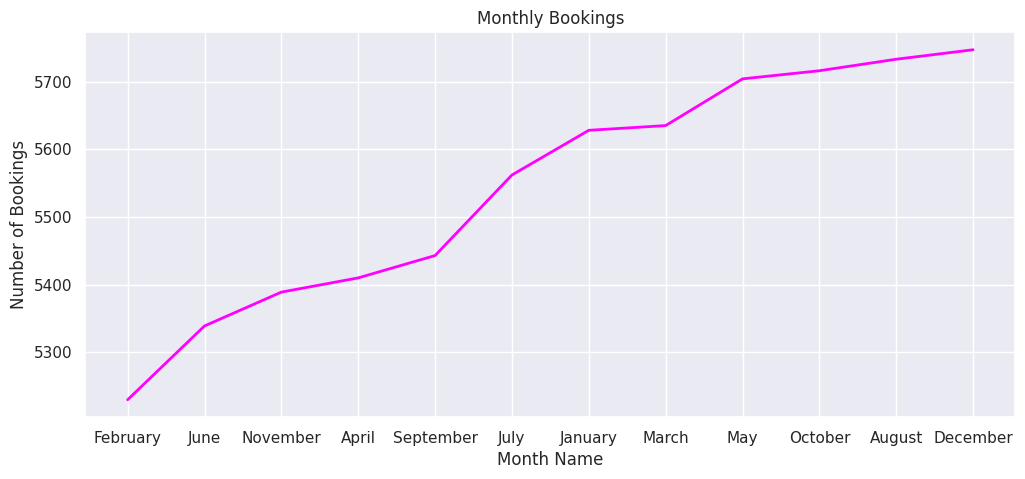

In [22]:
#Visualizating the top 10 
plt.figure(figsize=(12,5))
ax=sns.lineplot(x = "Month",
            y = "Booking_ID",
            data = Monthly_bookings,
            linewidth = 2,
            color='magenta').set(title = "Monthly Bookings")
sns.set_theme(style = "darkgrid")
plt.xlabel("Month Name")
plt.ylabel("Number of Bookings")

The chart shows that December has the lowest overall bookings while february has the lowest monthly bookings.

### *d) Which countries have the highest number of bookings*

To understand this, we created a Geomap showing the number of guests per destination country.

First, we need to create longitudes and latitudes columns from the Origin_Country column.

In [23]:
# Grouping the number of bookings by destination country
destination_countries = df[["Destination_Country","Booking_ID"]].groupby(["Destination_Country"]).count().reset_index().sort_values(by = "Booking_ID", ascending = False)
#Changing the Booking_ID column name to Number of Bookings
destination_countries = destination_countries.rename(columns ={"Booking_ID": "Number_of_Bookings"})
destination_countries.head()

,Destination_Country,Number_of_Bookings
19,New Zealand,3447
18,Nepal,3446
5,Egypt,3422
3,Colombia,3408
2,China,3391


In [24]:
# Importing the necessary library
from geopandas.tools import geocode
# iterating through the df dataframe
for index, row in destination_countries.iterrows():
    try:
        print(row["Destination_Country"])
        information = geocode(row["Destination_Country"], provider = 'nominatim', user_agent = "ben", timeout = 5)
        destination_countries.loc[index, 'Destination_Country_Longitude'] = information.geometry.loc[0].x
        destination_countries.loc[index, 'Destination_Country_Latitude'] = information.geometry.loc[0].y
    except TypeError:
        print("NaN")

New Zealand
Nepal
Egypt
Colombia
China
Denmark
Israel
France
Iceland
Italy
Canada
Ireland
Germany
India
Maldives
Mexico
Japan
Brazil
Kenya
Iran


In [25]:
#Checking the new dataframe
destination_countries.head()

,Destination_Country,Number_of_Bookings,Destination_Country_Longitude,Destination_Country_Latitude
19,New Zealand,3447,172.834408,-41.500083
18,Nepal,3446,84.091714,28.108393
5,Egypt,3422,29.267547,26.254049
3,Colombia,3408,-72.908813,4.099917
2,China,3391,104.999927,35.000074


In [26]:
#Creating the map
fig = px.scatter_mapbox(destination_countries,
                       lon = "Destination_Country_Longitude",
                       lat = "Destination_Country_Latitude",
                       zoom = 1,
                       color = "Number_of_Bookings",
                       size = "Number_of_Bookings",
                       hover_name= "Destination_Country",
                       width = 1200,
                       height = 900,
                       title ="Number of Bookings by Destination Country")
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":50,"l":0, "b":10})
fig.show()

The map shows that New Zealand had the highest number of bookings, followed by Nepal. Iran had the lowest number of bookings

# **Key Takeways**

This exploratory data analysis project has helped us discover valuable insights that can be helpful to stakeholders in the hospitality sector:

More customers are coming from Indonesia, Malaysia, Singapore, and Thailand. Therefore, anyone seeking to advertise their hospitality services should focus on those countries to increase the ROI of their advertisement. 

Visitors now understand that some months, like February, June, and November, have few customers, so it is the best time to visit for those who like off-peak durations. 

Hotel owners in countries like Iran, Kenya, Brazil, and Japan now understand that their number of bookings is low compared to the other countries. Therefore, they need to find ways to increase demand for their destinations to match the others. They need to conduct further analysis to find the factors that may be leading to such low bookings. Potential investors now understand that investing in those countries might be risky.